In [1]:
import numpy as np
info = np.genfromtxt('../../data/befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)
print(info)
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [2]:
mask = (info[:,0] == 2015)
def people_in_each_neighbourhood(n):
    people_in_given_n = info[mask & (info[:,1] == n)]
    sum_of_people = people_in_given_n[:,4].sum()
    return sum_of_people
people_per_nb = dict([(n,people_in_each_neighbourhood(n)) for n in neighb.keys()])
print(people_per_nb)



{1: 51937, 2: 75113, 3: 78802, 4: 61623, 5: 51727, 6: 39537, 7: 43908, 8: 53604, 9: 55205, 10: 64967, 99: 3872}


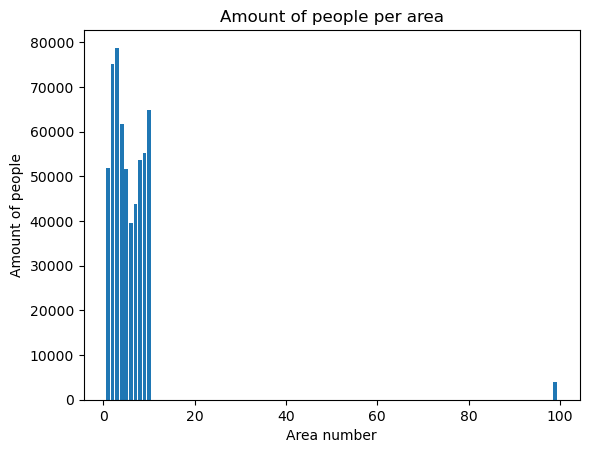

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
area_number = people_per_nb.keys()
amount_of_people = people_per_nb.values()


ax.bar(area_number, amount_of_people)

ax.set_ylabel('Amount of people')
ax.set_xlabel('Area number')
ax.set_title('Amount of people per area')

plt.show()

In [6]:
mask2 = ((info[:,0] == 2015) & (info[:,2] > 65))
elders = info[mask2]
print(elders)
print(elders[:,4].sum())


[[2015    1   66 5100  519]
 [2015    1   66 5104    1]
 [2015    1   66 5106    1]
 ...
 [2015   99   82 5100    1]
 [2015   99   86 5289    1]
 [2015   99   90 5289    1]]
55750


In [8]:
mask3 = (elders[:,3] != 5100)
elders_not_from_dk = elders[mask3]
print(elders_not_from_dk[:,4].sum())

3451


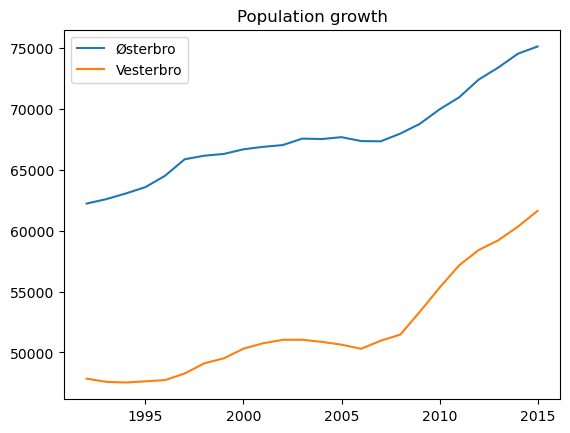

In [28]:
start = 1992
end = 2015
østerbro = 2
vesterbro = 4
year_list = np.arange(start, end+1)

def people_in_neighbourhood(start, n):
    people_in_given_n = info[(info[:,0] == start) & (info[:,1] == n)]
    sum_of_people = people_in_given_n[:,4].sum()
    return sum_of_people

people_in_østerbro = np.array([people_in_neighbourhood(s, østerbro) for s in year_list])
people_in_vesterbro = np.array([people_in_neighbourhood(s, vesterbro) for s in year_list])

plt.title("Population growth")
plt.plot(year_list, people_in_østerbro, label="Østerbro")
plt.plot(year_list, people_in_vesterbro, label="Vesterbro")
plt.legend()